In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_df = pd.read_csv("credit.csv")

In [3]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
print(f"Data has {credit_df.shape[0]} rows and {credit_df.shape[1]} columns")

Data has 1000 rows and 17 columns


In [5]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
catCol = []
numCol = []
for i in credit_df.columns:
    if credit_df[i].dtype == 'object':
        catCol.append(i)
    else:
        numCol.append(i)

In [8]:
print("Categorical Columns: ", catCol)
print("Numerical Columns: ", numCol)

Categorical Columns:  ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
Numerical Columns:  ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']


In [9]:
credit_df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [10]:
credit_df[catCol].describe().T

,count,unique,top,freq
checking_balance,1000,4,unknown,394
credit_history,1000,5,good,530
purpose,1000,6,furniture/appliances,473
savings_balance,1000,5,< 100 DM,603
employment_duration,1000,5,1 - 4 years,339
other_credit,1000,3,none,814
housing,1000,3,own,713
job,1000,4,skilled,630
phone,1000,2,no,596
default,1000,2,no,700


In [11]:
for i in catCol:
    print(i)
    print(credit_df[i].value_counts())
    print("\n")

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64


purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64


savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64


other_credit
none     814
bank     139
store     47
Name: other_credit, dtype: int64


housing
own      713
rent     179
other    108
Name: housing, dtype: int64


job
skilled       630
unskilled     200
managemen

In [15]:
credit_df['purpose'] = credit_df['purpose'].replace("car0", "car")
credit_df['savings_balance'] = credit_df['savings_balance'].replace("> 1000 DM", "500 - 1000 DM")
# credit_df['savings_balance'] = credit_df['savings_balance'].replace("500 - 1000 DM", "> 500 DM")

In [16]:
for i in catCol:
    print(i)
    print(credit_df[i].value_counts())
    print("\n")

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64


credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64


purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64


savings_balance
< 100 DM         603
unknown          183
500 - 1000 DM    111
100 - 500 DM     103
Name: savings_balance, dtype: int64


employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64


other_credit
none     814
bank     139
store     47
Name: other_credit, dtype: int64


housing
own      713
rent     179
other    108
Name: housing, dtype: int64


job
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int6

In [17]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

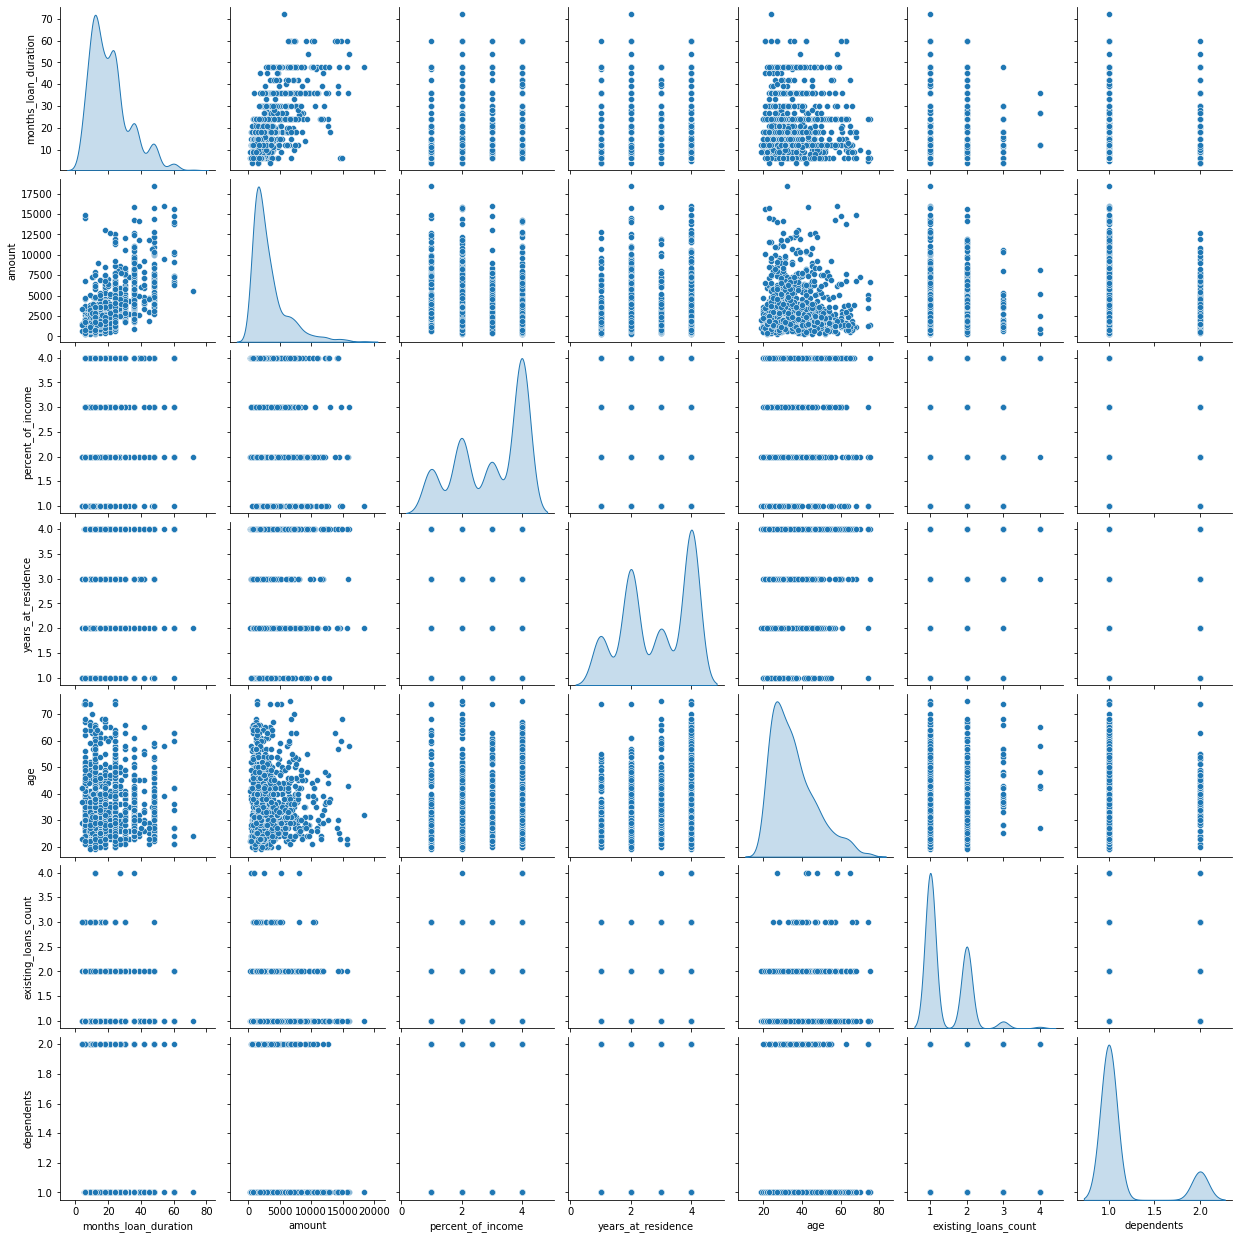

In [18]:
sns.pairplot(credit_df, diag_kind='kde')

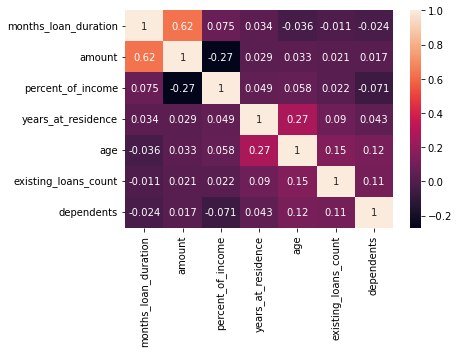

In [19]:
sns.heatmap(credit_df.corr(), annot=True);

In [20]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [21]:
for feature in catCol: 
    credit_df[feature] = pd.Categorical(credit_df[feature]).codes

In [22]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,3,1169,3,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,3,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,2,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,3,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1


In [23]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [24]:
X = credit_df.drop("default" , axis=1)
y = credit_df.pop("default")

In [42]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify= y) 
# stratify = y is used to make split on ratio of target count

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [44]:
log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_train, log_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       490
           1       0.57      0.31      0.41       210

    accuracy                           0.72       700
   macro avg       0.66      0.61      0.61       700
weighted avg       0.70      0.72      0.70       700



In [47]:
confusion_matrix(y_train, log_train_pred)

array([[441,  49],
       [144,  66]])

In [48]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       210
           1       0.52      0.27      0.35        90

    accuracy                           0.71       300
   macro avg       0.63      0.58      0.58       300
weighted avg       0.67      0.71      0.67       300



In [34]:
confusion_matrix(y_test, log_pred)

array([[188,  22],
       [ 66,  24]])

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [50]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
from sklearn import tree
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [52]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.117301
months_loan_duration  0.141084
credit_history        0.084883
purpose               0.040708
amount                0.245100
savings_balance       0.022051
employment_duration   0.049887
percent_of_income     0.044982
years_at_residence    0.026769
age                   0.117773
other_credit          0.032515
housing               0.004355
existing_loans_count  0.018125
job                   0.026354
dependents            0.005026
phone                 0.023087


In [53]:
y_predict = dt_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       210
           1       0.45      0.46      0.45        90

    accuracy                           0.67       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.67      0.67      0.67       300



In [54]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [56]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
credit_tree_regularized.close()

In [57]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.117301
months_loan_duration  0.141084
credit_history        0.084883
purpose               0.040708
amount                0.245100
savings_balance       0.022051
employment_duration   0.049887
percent_of_income     0.044982
years_at_residence    0.026769
age                   0.117773
other_credit          0.032515
housing               0.004355
existing_loans_count  0.018125
job                   0.026354
dependents            0.005026
phone                 0.023087


In [58]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [64]:
import matplotlib.pyplot as plt

AUC: 0.845


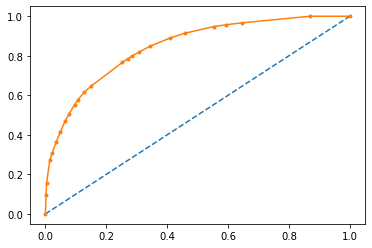

In [65]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.757


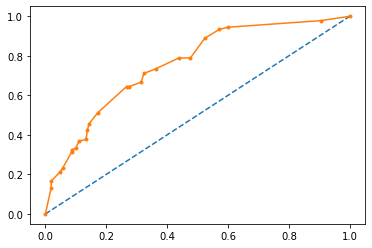

In [66]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       490
           1       0.71      0.55      0.62       210

    accuracy                           0.80       700
   macro avg       0.77      0.73      0.74       700
weighted avg       0.79      0.80      0.79       700



In [61]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       210
           1       0.55      0.38      0.45        90

    accuracy                           0.72       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300



In [62]:
confusion_matrix(y_train, ytrain_predict)

array([[443,  47],
       [ 94, 116]])

In [63]:
confusion_matrix(y_test, ytest_predict)

array([[182,  28],
       [ 56,  34]])

In [67]:
reg_dt_model.score(X_train,y_train)

0.7985714285714286

In [68]:
reg_dt_model.score(X_test,y_test)

0.72

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, random_state=0)

In [92]:
ytrain_predict = clf.predict(X_train)
ytest_predict = clf.predict(X_test)

AUC: 1.000


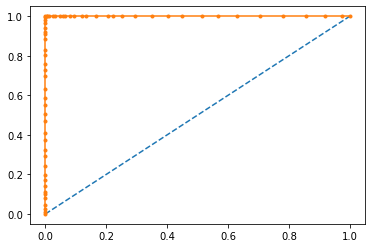

In [93]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.776


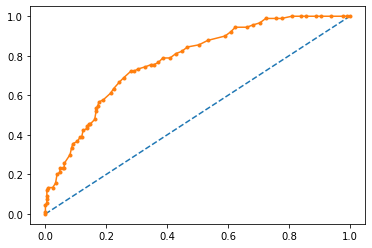

In [94]:
# AUC and ROC for the test data
# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [95]:
confusion_matrix(y_test, ytest_predict)

array([[185,  25],
       [ 55,  35]])

In [96]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       210
           1       0.58      0.39      0.47        90

    accuracy                           0.73       300
   macro avg       0.68      0.63      0.64       300
weighted avg       0.71      0.73      0.72       300

